<a href="https://colab.research.google.com/github/baumanbertti/Workflow_UFRGS/blob/main/Estudos_Celulas_de_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import missingno as msno


In [2]:
def plot_loss_and_acc(history):
    train_loss = history.history["loss"]
    train_acc = history.history["accuracy"]
    val_loss = history.history["val_loss"]
    val_acc = history.history["val_accuracy"]

    fig = plt.figure(figsize=(12,5))

    ax = fig.add_subplot(121)
    ax.plot(range(len(train_loss)), train_loss, label="Train Loss");
    ax.plot(range(len(val_loss)), val_loss, label="Validation Loss");
    plt.xlabel("Epochs"); plt.ylabel("Loss");
    plt.title("Train Loss vs Validation Loss");
    plt.legend(loc="best");

    ax = fig.add_subplot(122)
    ax.plot(range(len(train_acc)), train_acc, label="Train Accuracy");
    ax.plot(range(len(val_acc)), val_acc, label="Validation Accuracy");
    plt.xlabel("Epochs"); plt.ylabel("Accuracy");
    plt.title("Train Accuracy vs Validation Accuracy");
    plt.legend(loc="best");

In [3]:
file_ = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

In [4]:
column_names = ['Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class',
]


In [5]:
df = pd.read_csv(file_, header=None, names=column_names)

In [6]:
df['Class_bin'] = (df['Class'] == 4).values.astype('int') #modificando 4 (maligno) e 2(benigno) em binario
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_bin
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


In [7]:
df.replace('?', np.nan, inplace =True) #Trocando as variaveis faltantes por Nans
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_bin
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


<Axes: >

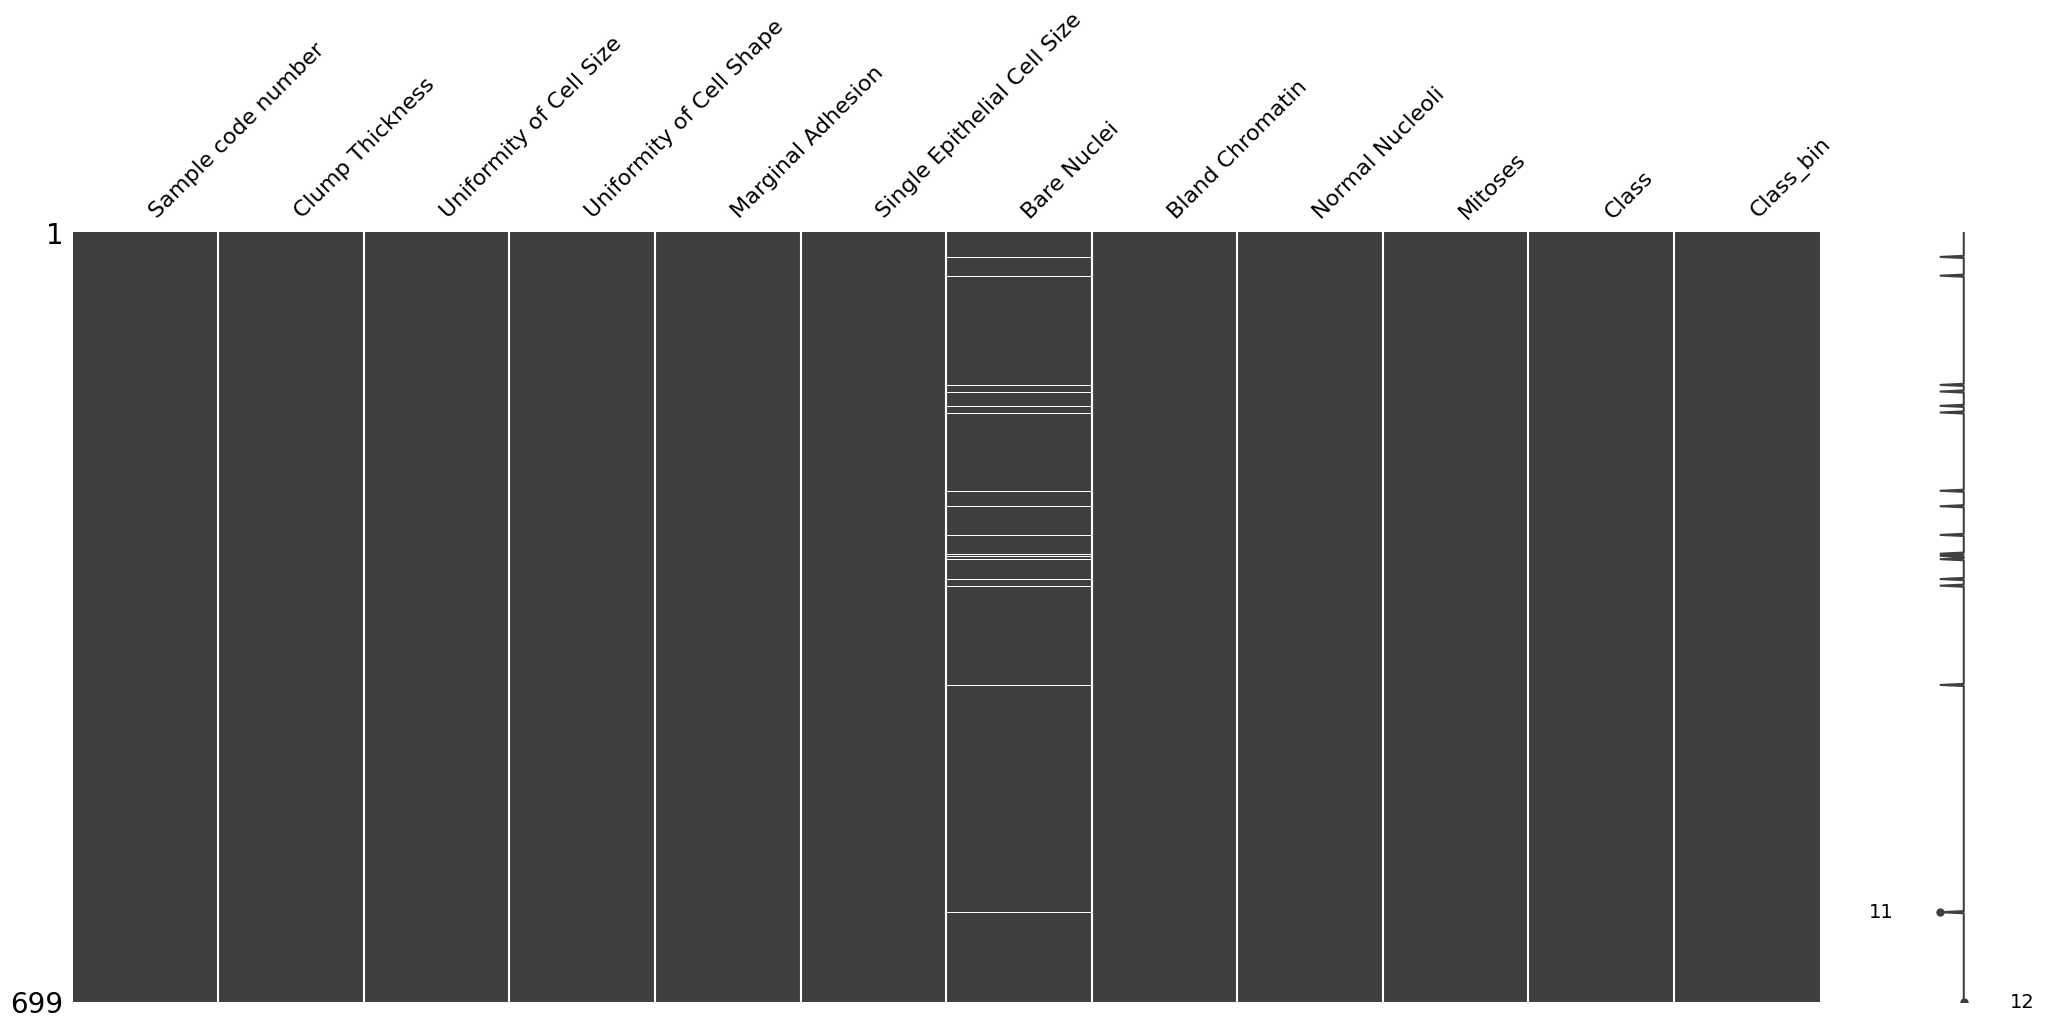

In [8]:
msno.matrix(df) #A parte visual dos dados faltantes

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
Class_bin                       0
dtype: int64


Text(0, 0.5, 'número de nans por feature')

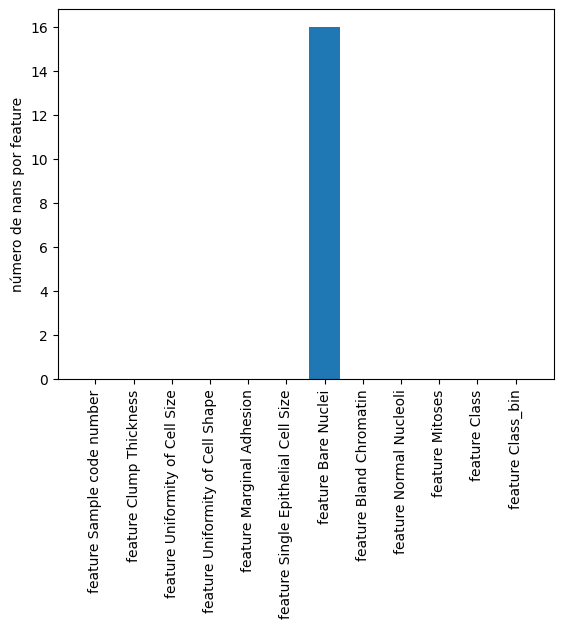

In [9]:
# Soma de nans em cada coluna

print (df.isna().sum(axis=0))

list_columns = list(df.columns)

plt.bar(range(len(list_columns)), df.isna().sum(axis=0), width=0.8)
plt.xticks(range(len(list_columns)), ['feature '+str(x) for x in list_columns], rotation=90)
plt.xlabel('')
plt.ylabel('número de nans por feature')

In [10]:
df=df.dropna() #filtra os dados faltantes, retirando as linhas com esses dados
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Class_bin
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


<Axes: >

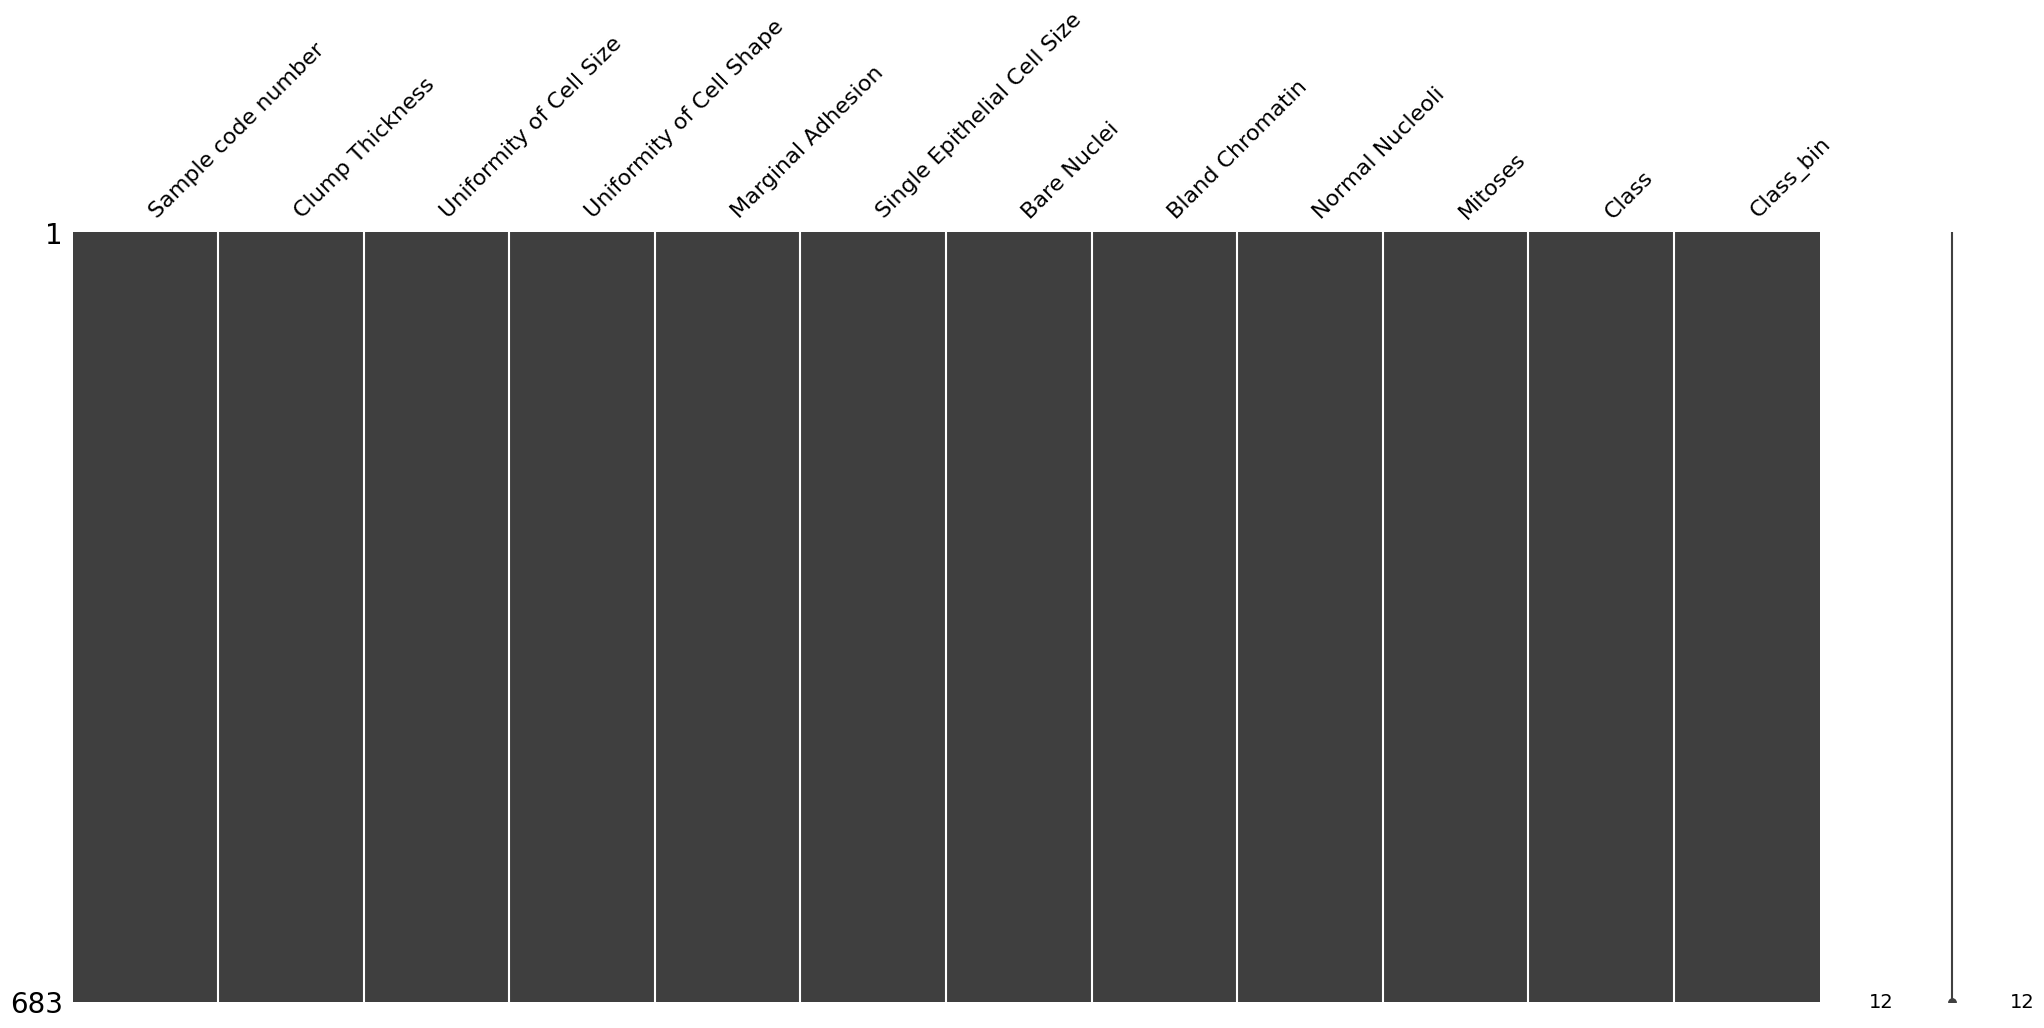

In [11]:
msno.matrix(df) #Parte visual sem os dados faltantes

In [12]:
df_ = df.copy()

In [13]:
df_.drop(["Sample code number", "Class"], axis=1,inplace=True)

In [14]:
df_bin=df_["Class_bin"].value_counts().reset_index() #quantidade gerais de canceres benignos e malignos
df_bin.columns=["Presence_of_cancer", "Total"]

<Axes: xlabel='Presence_of_cancer', ylabel='Total'>

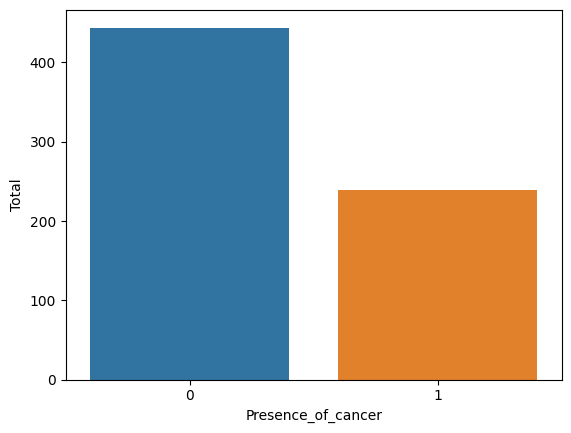

In [15]:
sns.barplot( data=df_bin, x="Presence_of_cancer", y="Total")

In [16]:
df_bin_one = df_.query('Class_bin == 1') #selecionar apenas as linhas com cancer maligno
df_bin_one.drop(["Class_bin"], axis=1,inplace=True)

<ipython-input-16-ccc0f11f0ca7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin_one.drop(["Class_bin"], axis=1,inplace=True)


In [17]:
df_bin_zero = df_.query('Class_bin == 0') #selecionar apenas as linhas com cancer benigno
df_bin_zero.drop(["Class_bin"], axis=1,inplace=True)

<ipython-input-17-8ac3e89b2732>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin_zero.drop(["Class_bin"], axis=1,inplace=True)


<ipython-input-16-782f25e34630>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_.corr(method='spearman'), annot=True, fmt='.2f', cmap="viridis", linecolor="#222", ax=ax1)


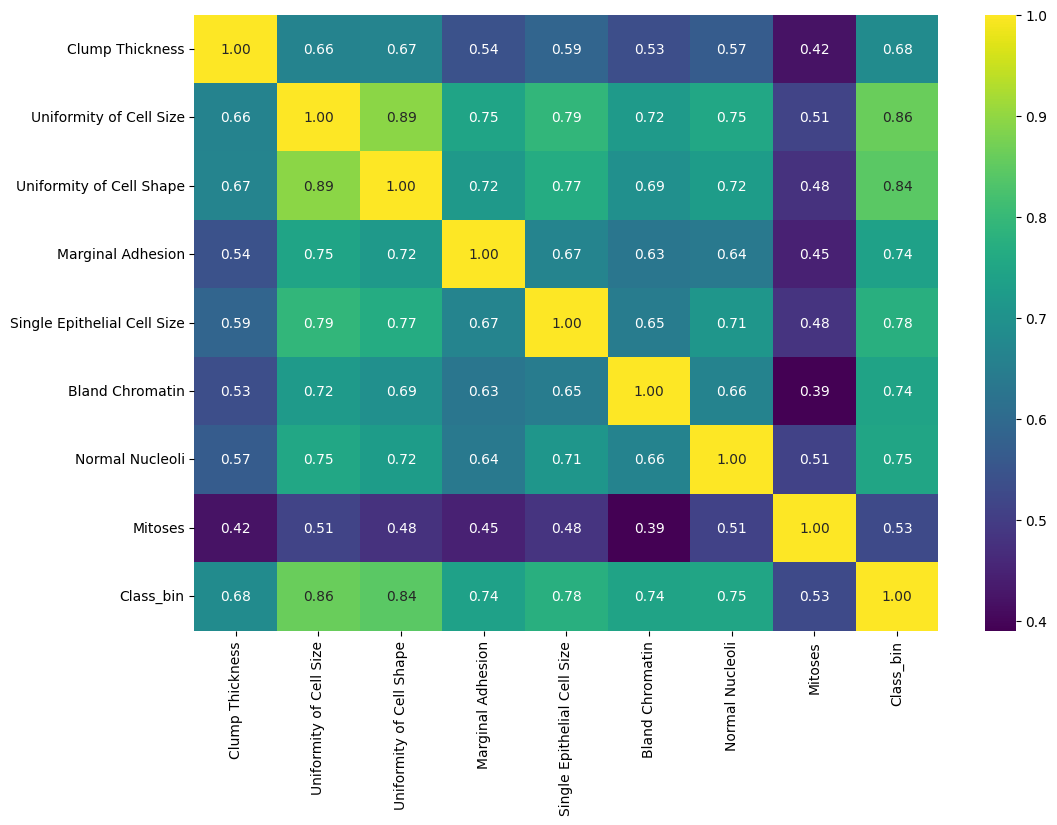

In [16]:
fig, (ax1) = plt.subplots(1, figsize=(12,8))
sns.heatmap(df_.corr(method='spearman'), annot=True, fmt='.2f', cmap="viridis", linecolor="#222", ax=ax1)
plt.show()

In [17]:
# Vamos baixar uma ferramenta de Partial dependence plot

link_pdp_tool = 'https://raw.githubusercontent.com/attilalr/pdp-tool/main/pdp_tool.py'

try:
    from pdp_tool import pdp
except:
    !wget -d {link_pdp_tool}
    from pdp_tool import pdp

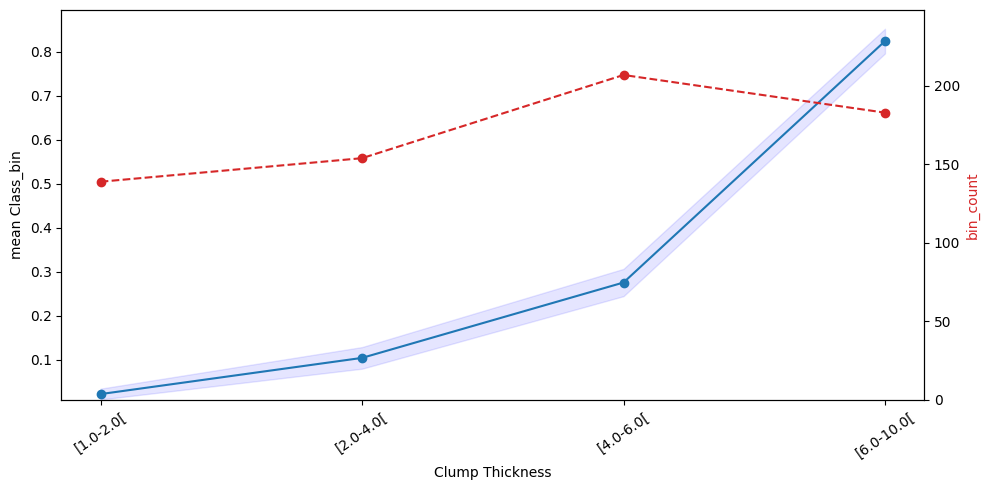

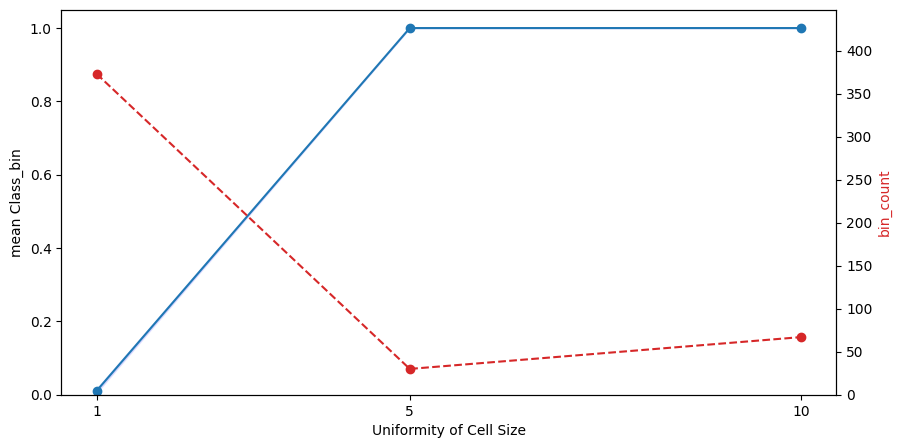

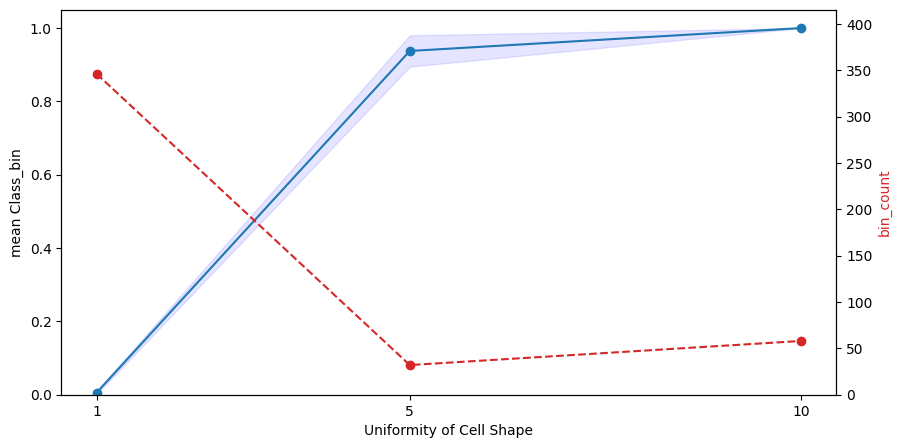

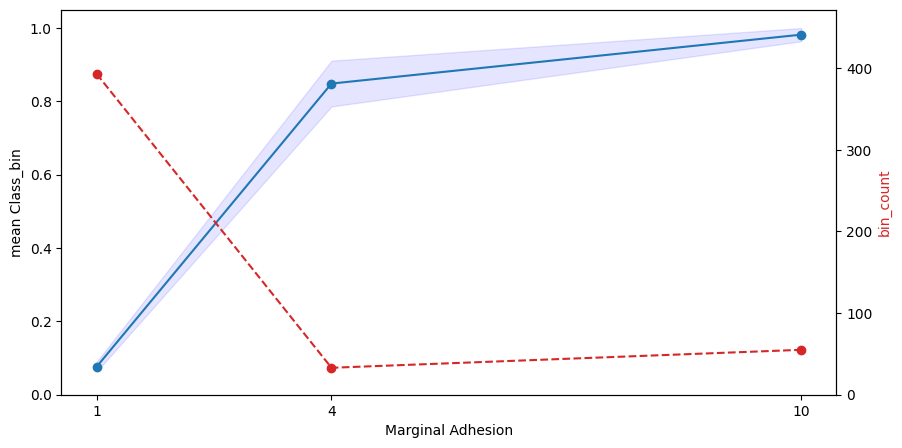

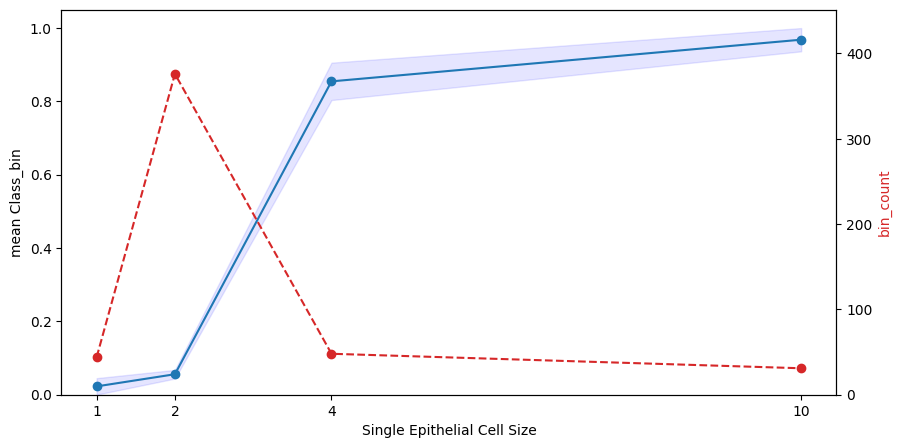

feature Bare Nuclei with problems.


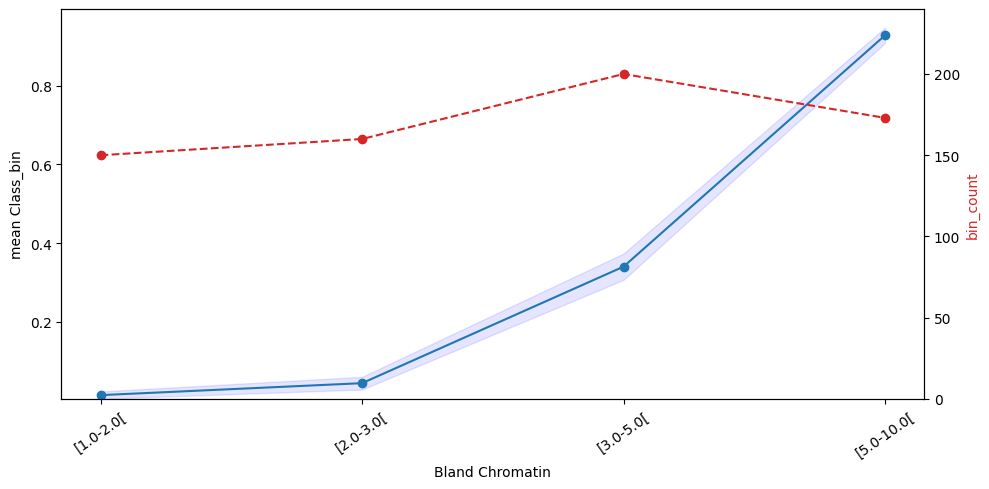

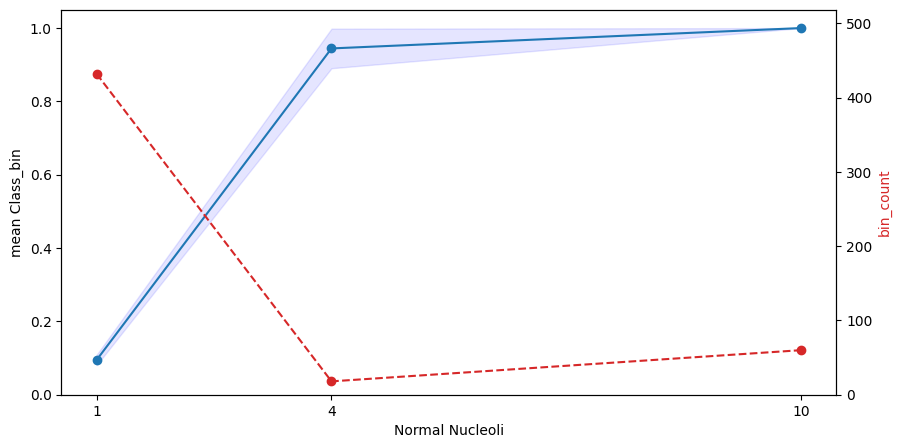

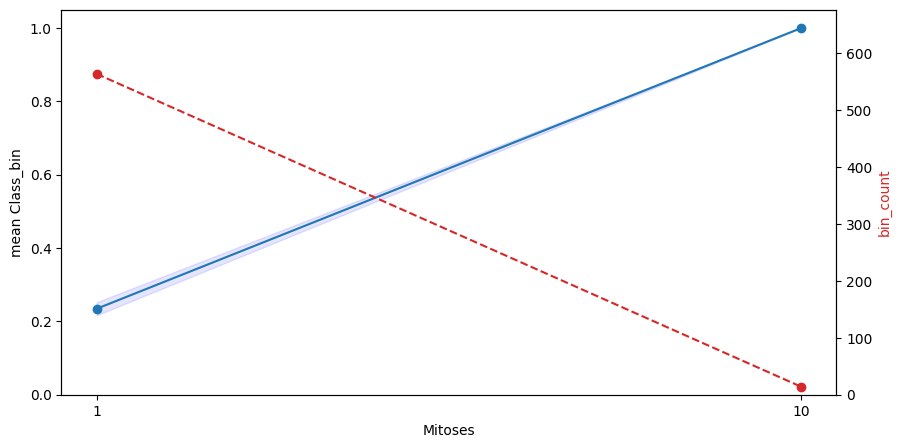

In [18]:
pdp(df_,
    df_.columns,
    'Class_bin',
    n=4, #aumenta a quantidade de faixas verticais que serão analisadas. Integra menos pontos para achar a média
    writefolder=None,
    digits=1,
    figsize=(10, 5),
    showbincount=True,
    ylim_origin=True,
    )

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = df_.drop(['Class_bin'], axis = 1)
y = df_['Class_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# chama o 'estandardizador'
scaler = preprocessing.StandardScaler()
# treina/fit com os dados de treino
scaler.fit(X_train)

# Atenção para a boa prática em ML!
# transform no training e no test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print (X_train_scaled.mean(axis=0))
print (X_train_scaled.std(axis=0))

[-1.24493628e-16  3.71622770e-18 -1.11486831e-17  5.38853016e-17
  5.76015293e-17 -2.04392523e-17  1.48649108e-17  1.02196262e-16
 -8.17570093e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# chama o 'estandardizador'
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# treina com os dados de treino
scaler.fit(X_train)

# opera no training e no test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print (X_train_scaled.mean(axis=0))
print (X_train_scaled.std(axis=0))

[0.37354719 0.22873082 0.24081822 0.19967457 0.24291027 0.25987913
 0.26731753 0.19967457 0.06113436]
[0.307305   0.33535571 0.32938193 0.31799987 0.24659617 0.39059849
 0.27213058 0.3353155  0.18354031]


In [21]:
#treinamento com rede neural
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = df_.drop(['Class_bin'], axis = 1)
y = to_categorical(df_['Class_bin'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(32, input_dim = len(X_train[0]), activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(y_train[0]), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
y_train[0]

array([1., 0.], dtype=float32)

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60)

Epoch 1/60
18/18 [==============================] - 3s 30ms/step - loss: 0.6272 - accuracy: 0.7985 - val_loss: 0.5628 - val_accuracy: 0.9416
Epoch 2/60
18/18 [==============================] - 0s 7ms/step - loss: 0.5217 - accuracy: 0.9451 - val_loss: 0.4594 - val_accuracy: 0.9635
Epoch 3/60
18/18 [==============================] - 0s 7ms/step - loss: 0.4173 - accuracy: 0.9652 - val_loss: 0.3574 - val_accuracy: 0.9489
Epoch 4/60
18/18 [==============================] - 0s 7ms/step - loss: 0.3108 - accuracy: 0.9634 - val_loss: 0.2688 - val_accuracy: 0.9416
Epoch 5/60
18/18 [==============================] - 0s 7ms/step - loss: 0.2167 - accuracy: 0.9652 - val_loss: 0.2037 - val_accuracy: 0.9197
Epoch 6/60
18/18 [==============================] - 0s 7ms/step - loss: 0.1533 - accuracy: 0.9652 - val_loss: 0.1611 - val_accuracy: 0.9343
Epoch 7/60
18/18 [==============================] - 0s 9ms/step - loss: 0.1214 - accuracy: 0.9634 - val_loss: 0.1408 - val_accuracy: 0.9343
Epoch 8/60
18/18 [=

In [27]:
#validação do modelo com os dados de teste

_, score=model.evaluate(X_test,y_test)
print(f"Acuracia do data set: {round(score,2)*100}%")

5/5 [==============================] - 0s 4ms/step - loss: 0.0772 - accuracy: 0.9708
Acuracia do data set: 97.0%


In [30]:
#teste para verificar o modelo. Lembrando que a primeira posição é 0 e a segunda, 1.
#print(x_test[10:15])
#print(y_test[10:15])
outputs = model.predict(X_test)
#print ('outputs')
#print (outputs)
#for output in outputs:
#  print(np.argmax(output))

y_pred = outputs.argmax(axis=1)
y_pred

5/5 [==============================] - 0s 4ms/step


array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0])

Estudar os escores precision, recall, f1-score do modelo treinado

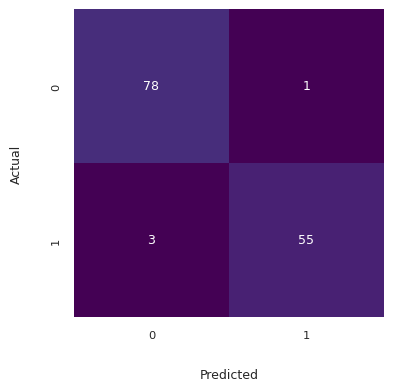

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_true, y_pred
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), y_pred) #matriz de confusão

plt.figure(figsize=(4,4))
sns.set(font_scale = 0.75)

ax = sns.heatmap(
    cm, annot=True, fmt='d',
    cbar=False, cmap='viridis', vmax=600
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [36]:
from sklearn.metrics import precision_score #Precision

precision_score(np.asarray(y_test).argmax(axis=1), y_pred)


0.9821428571428571

In [37]:
#traz de volta quantos falso-negativos foram dados
from sklearn.metrics import recall_score #Recall

recall_score(np.asarray(y_test).argmax(axis=1), y_pred, average=None) #‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’, 'None'

array([0.98734177, 0.94827586])

In [38]:
from sklearn.metrics import f1_score #F1

f1_score(np.asarray(y_test).argmax(axis=1), y_pred, average=None) #‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’, 'None'

array([0.975     , 0.96491228])

In [45]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(np.asarray(y_test).argmax(axis=1),y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.99      0.97        79
     class 1       0.98      0.95      0.96        58

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



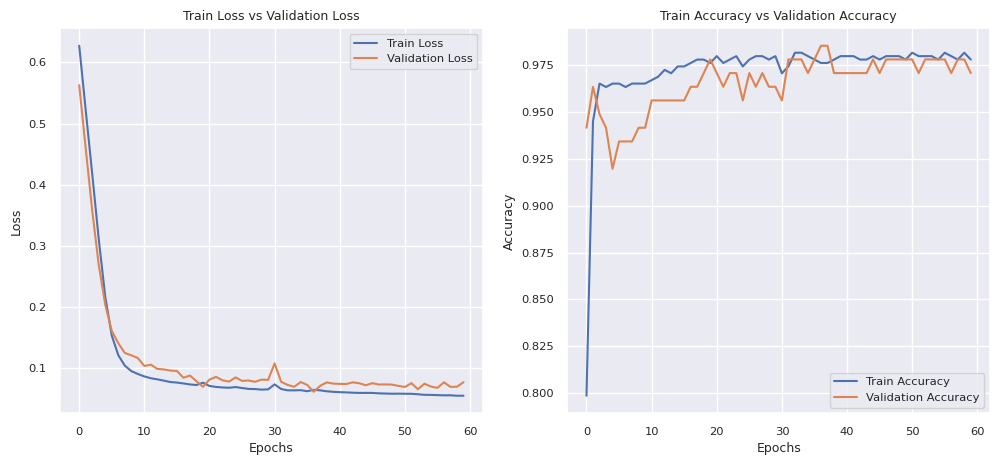

In [47]:
plot_loss_and_acc(history)